Trecho de código de bibliotecas

In [7]:
install.packages("gridExtra")
#install.packages("agricolae")
#install.packages("repr")
#install.packages("ggplot2")
#install.packages("tidyverse") 
#install.packages("repr")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [8]:
#bibliotecas a serem utilizadas 
#visualização de RMSE no jupyter
library(ggplot2)
library(tidyverse)
#library to plot two or more plots in a grid
library(gridExtra)
library(repr)




Trecho de código de leitura dos dados:

In [9]:
tsDia1=as.data.frame(read.table("../IoTa/1-100 (copy)/dias/dia2.txt"))
names(tsDia1)=c("Dia1")
kalman=as.data.frame(read.table("../IoTa/1-100 (copy)/resultados/df_kalmanSmoothing.txt"))
locf=as.data.frame(read.table("../IoTa//1-100 (copy)/resultados/df_locf.txt"))
inter=as.data.frame(read.table("../IoTa/1-100 (copy)/resultados/df_linear_interpolation.txt"))
kalmanRun=as.data.frame(read.table("../IoTa/1-100 (copy)/resultados/df_kalmanRun.txt"))
mean=as.data.frame(read.table("../IoTa/1-100 (copy)/resultados/df_mean.txt"))
median=as.data.frame(read.table("../IoTa/1-100 (copy)/resultados/df_median.txt"))
malExp=as.data.frame(read.table("../IoTa/1-100 (copy)/resultados/df_movingAverage_exponential.txt"))
malLin=as.data.frame(read.table("../IoTa/1-100 (copy)/resultados/df_movingAverage_linear.txt"))
malSim=as.data.frame(read.table("../IoTa/1-100 (copy)/resultados/df_movingAverage_simple.txt"))
spl=as.data.frame(read.table("../IoTa/1-100 (copy)/resultados/df_spline_interpolation.txt"))
sti=as.data.frame(read.table("../IoTa/1-100 (copy)/resultados/df_stine_interpolation.txt"))
names(kalman)=c("algoritmo" , "rmse", "mse", "mae", "mape")
names(inter)=c("algoritmo" , "rmse", "mse", "mae", "mape")
names(locf)=c("algoritmo" , "rmse", "mse", "mae", "mape")
names(mean)=c("algoritmo" , "rmse", "mse", "mae", "mape")
names(median)=c("algoritmo" , "rmse", "mse", "mae", "mape")
names(malExp)=c("algoritmo" , "rmse", "mse", "mae", "mape")
names(malLin)=c("algoritmo" , "rmse", "mse", "mae", "mape")
names(malSim)=c("algoritmo" , "rmse", "mse", "mae", "mape")
names(spl)=c("algoritmo" , "rmse", "mse", "mae", "mape")
names(sti)=c("algoritmo" , "rmse", "mse", "mae", "mape")

tamanho=rep(1:100,2, nrow(sti))
diaSemana=rep(1:7, each=300, len=nrow(sti))
quarto=rep(2:4, each=100, len=nrow(sti))

kalman=cbind(kalman,tamanho,diaSemana, quarto)
inter=cbind(inter,tamanho,diaSemana, quarto)
locf=cbind(locf,tamanho,diaSemana, quarto)
mean=cbind(mean,tamanho,diaSemana, quarto)
median=cbind(median,tamanho,diaSemana, quarto)
malExp=cbind(malExp,tamanho,diaSemana, quarto)
malLin=cbind(malLin,tamanho,diaSemana, quarto)
malSim=cbind(malSim,tamanho,diaSemana, quarto)
spl=cbind(spl,tamanho,diaSemana, quarto)
sti=cbind(sti,tamanho,diaSemana, quarto)


funções para tratamento
--

In [10]:
#parametros: data_vector: resultados da série temporal // metrica: métrica de erro // quarto: posicao // dia: dia da semana começando em 0 e terminando em 6
mediaDiaQuartos <- function(data_vector, metrica, quarto){
    retorno=c()
    for(dia in seq(1,7,1)){
        mean=c()
        sd=c()
        var=c()
        #recorte dos dados a partir do dia da semana, quarto e métrica
        aux=(data_vector[which(data_vector$diaSemana==dia & data_vector$quarto==quarto), metrica])
        #retirada da media pelo tamanho da lacuna
        for(i in seq(1,100,1)){
            mean=append(mean, mean(aux[seq(i,length(aux),100)]))
            sd=append(sd, sd(aux[seq(i,length(aux),100)]))
            var=append(var,var(aux[seq(i,length(aux),100)]))
        }
      retorno=rbind(retorno, cbind(mean, sd,var))
    }
    return(retorno)
}



Trecho de código de construção dos dataframes dos quartis:

In [11]:
#parametros: data_vector: resultados da série temporal // metrica: métrica de erro // quarto: posicao(2-4)
quartosSti=as.data.frame(mediaDiaQuartos(sti, "rmse", 2))
quartosSti=rbind(quartosSti, (mediaDiaQuartos(sti, "rmse", 3)))
quartosSti=rbind(quartosSti, (mediaDiaQuartos(sti, "rmse", 4)))
quartosSti$algoritmo="Sti"

tamanhoGap=seq(1,100,1)
dia=rep(1:7, each=100, len=nrow(quartosSti))
quarto=rep(2:4, each=700, len=nrow(quartosSti))

quartosSti$dia=dia
quartosSti$quarto=quarto


#parametros: data_vector: resultados da série temporal // metrica: métrica de erro // quarto: posicao(2-4)
quartosKal=as.data.frame(mediaDiaQuartos(kalman, "rmse", 2))
quartosKal=rbind(quartosKal, (mediaDiaQuartos(kalman, "rmse", 3)))
quartosKal=rbind(quartosKal, (mediaDiaQuartos(kalman, "rmse", 4)))
quartosKal$algoritmo="Kal"
quartosKal$dia=dia
quartosKal$quarto=quarto


quartosInter=as.data.frame(mediaDiaQuartos(inter, "rmse", 2))
quartosInter=rbind(quartosInter, (mediaDiaQuartos(inter, "rmse", 3)))
quartosInter=rbind(quartosInter, (mediaDiaQuartos(inter, "rmse", 4)))
quartosInter$algoritmo="Inter"
quartosInter$dia=dia
quartosInter$quarto=quarto



quartosLocf=as.data.frame(mediaDiaQuartos(locf, "rmse", 2))
quartosLocf=rbind(quartosLocf, (mediaDiaQuartos(locf, "rmse", 3)))
quartosLocf=rbind(quartosLocf, (mediaDiaQuartos(locf, "rmse", 4)))
quartosLocf$algoritmo="Locf"
quartosLocf$dia=dia
quartosLocf$quarto=quarto



quartosMean=as.data.frame(mediaDiaQuartos(mean, "rmse", 2))
quartosMean=rbind(quartosMean, (mediaDiaQuartos(mean, "rmse", 3)))
quartosMean=rbind(quartosMean, (mediaDiaQuartos(mean, "rmse", 4)))
quartosMean$algoritmo="Mean"
quartosMean$dia=dia
quartosMean$quarto=quarto

quartosMedian=as.data.frame(mediaDiaQuartos(median, "rmse", 2))
quartosMedian=rbind(quartosMedian, (mediaDiaQuartos(median, "rmse", 3)))
quartosMedian=rbind(quartosMedian, (mediaDiaQuartos(median, "rmse", 4)))
quartosMedian$algoritmo="Median"
quartosMedian$dia=dia
quartosMedian$quarto=quarto

quartosMalExp=as.data.frame(mediaDiaQuartos(malExp, "rmse", 2))
quartosMalExp=rbind(quartosMalExp, (mediaDiaQuartos(malExp, "rmse", 3)))
quartosMalExp=rbind(quartosMalExp, (mediaDiaQuartos(malExp, "rmse", 4)))
quartosMalExp$algoritmo="EMA"
quartosMalExp$dia=dia
quartosMalExp$quarto=quarto

quartosMalLin=as.data.frame(mediaDiaQuartos(malLin, "rmse", 2))
quartosMalLin=rbind(quartosMalLin, (mediaDiaQuartos(malLin, "rmse", 3)))
quartosMalLin=rbind(quartosMalLin, (mediaDiaQuartos(malLin, "rmse", 4)))
quartosMalLin$algoritmo="LMA"
quartosMalLin$dia=dia
quartosMalLin$quarto=quarto

quartosMalSim=as.data.frame(mediaDiaQuartos(malSim, "rmse", 2))
quartosMalSim=rbind(quartosMalSim, (mediaDiaQuartos(malSim, "rmse", 3)))
quartosMalSim=rbind(quartosMalSim, (mediaDiaQuartos(malSim, "rmse", 4)))
quartosMalSim$algoritmo="LMA"
quartosMalSim$dia=dia
quartosMalSim$quarto=quarto



quartosSpl=as.data.frame(mediaDiaQuartos(spl, "rmse", 2))
quartosSpl=rbind(quartosSpl, (mediaDiaQuartos(spl, "rmse", 3)))
quartosSpl=rbind(quartosSpl, (mediaDiaQuartos(spl, "rmse", 4)))
quartosSpl$algoritmo="Spline"
quartosSpl$dia=dia
quartosSpl$quarto=quarto

todosQuartos=rbind(quartosInter, quartosKal, quartosLocf, quartosMean, quartosMedian, quartosMalExp, quartosMalSim, quartosMalLin, quartosSpl,quartosSti)
head(todosQuartos)

mean,sd,var,algoritmo,dia,quarto
0.2152466,0.04012729,0.001610199,Inter,1,2
0.2152466,0.04012728,0.001610199,Inter,1,2
0.2152466,0.04012730,0.001610200,Inter,1,2
0.2152466,0.04012730,0.001610200,Inter,1,2
0.2152466,0.04012730,0.001610200,Inter,1,2
0.2152466,0.04012729,0.001610199,Inter,1,2


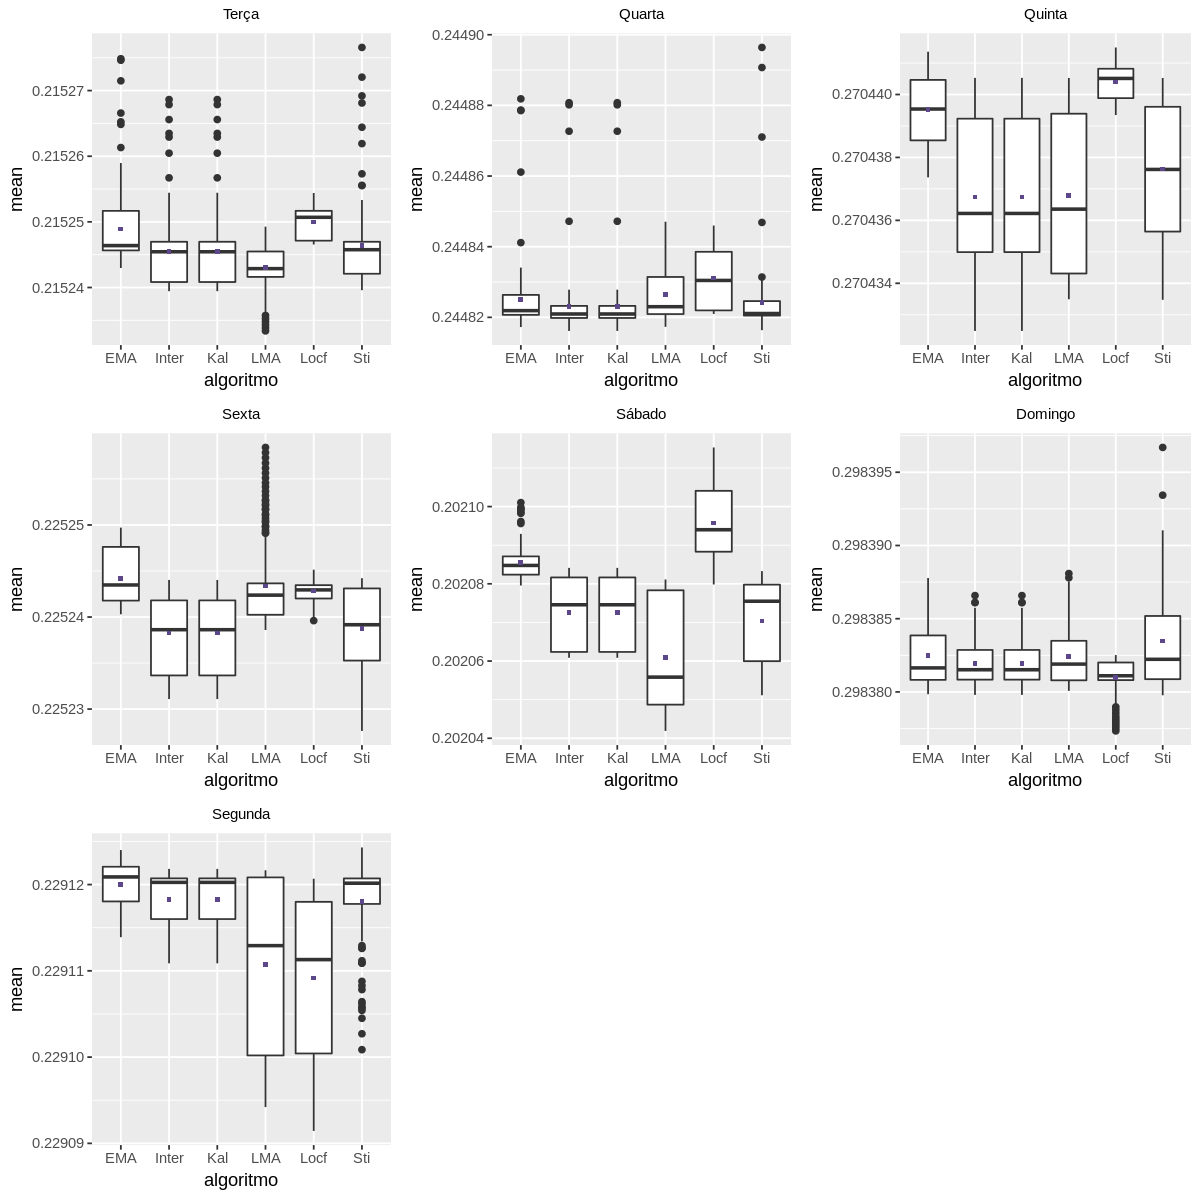

In [34]:
days=c("Terça", "Quarta", "Quinta", "Sexta", "Sábado", "Domingo", "Segunda")

q=list()
min=0.19
max=0.3
for (i in seq(1,7,1)){
    q[[i]]=ggplot(todosQuartos[which(todosQuartos$quarto==2 & todosQuartos$dia==i & todosQuartos$algoritmo!="Mean" &  todosQuartos$algoritmo!="Median" & todosQuartos$algoritmo!="Spline"),], aes(x=algoritmo, y=mean)) + 
    geom_boxplot()+
    ggtitle("Boxplot q2")+  theme(plot.title = element_text(hjust = 0.5)) +
 #   ylim(min,max)+
    stat_summary(fun.y = "mean", geom = "point", colour = "mediumpurple4", shape = 15, size = 1)+
    ggtitle(paste(days[i]))+  theme(plot.title = element_text(hjust = 0.5, size=9))
}
#print(q)


options(repr.plot.width=10, repr.plot.height=10)
do.call("grid.arrange", c(q, ncol=3))

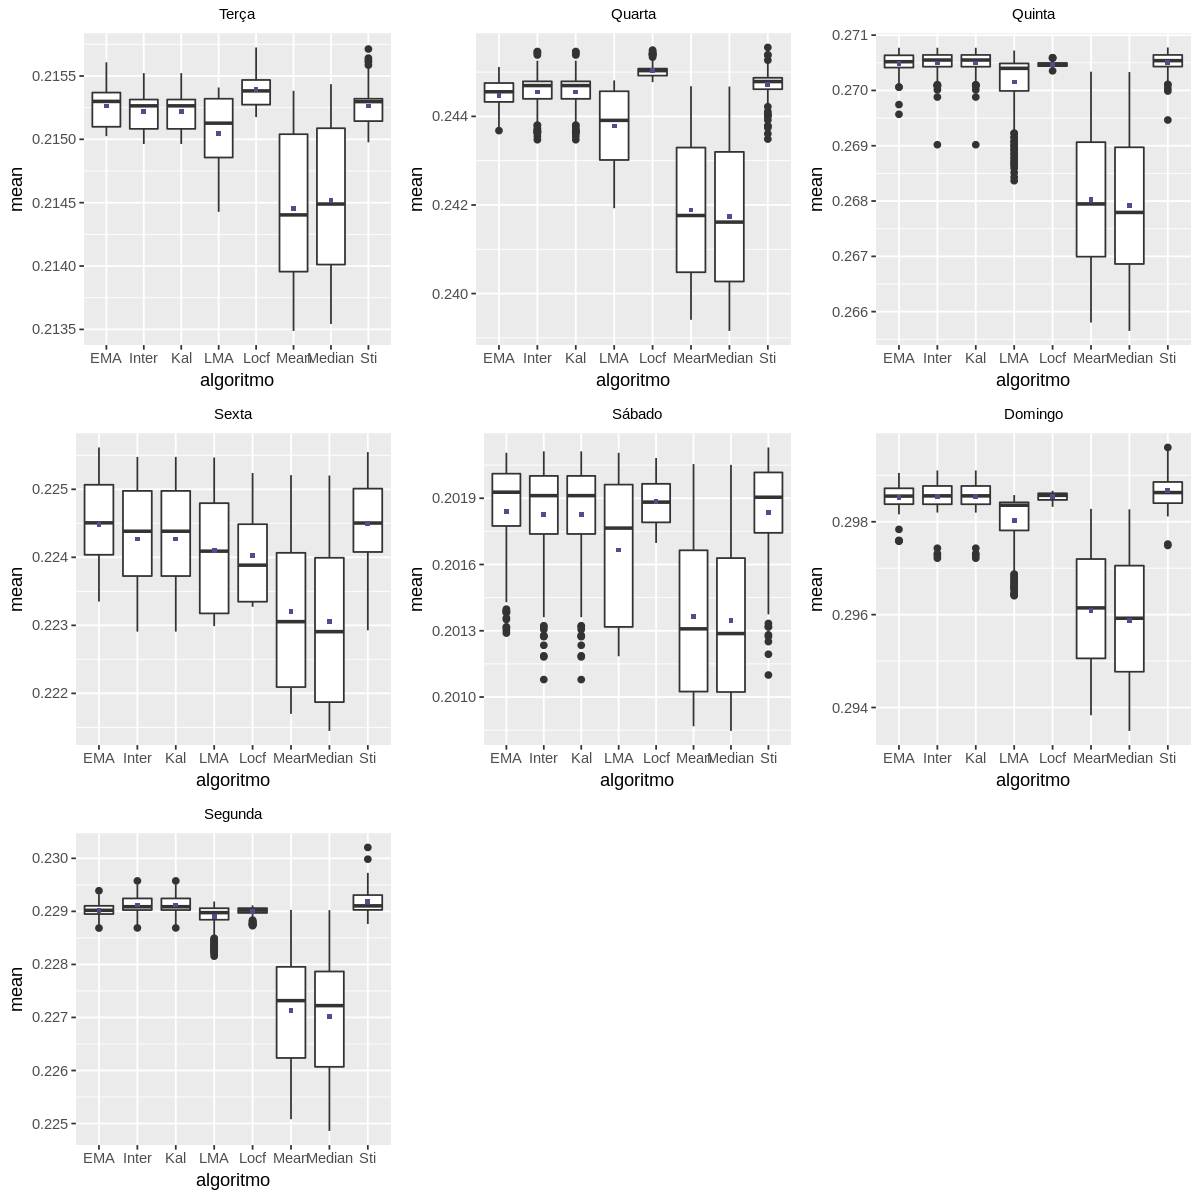

In [35]:
days=c("Terça", "Quarta", "Quinta", "Sexta", "Sábado", "Domingo", "Segunda")

q=list()
min=0
max=0.04
for (i in seq(1,7,1)){
    q[[i]]=ggplot(todosQuartos[which(todosQuartos$quarto==3 & todosQuartos$dia==i & todosQuartos$algoritmo!="Spline"),], aes(x=algoritmo, y=mean)) + 
    geom_boxplot()+
    ggtitle("Boxplot q3")+  theme(plot.title = element_text(hjust = 0.5)) +
#    ylim(min,max)+
    stat_summary(fun.y = "mean", geom = "point", colour = "mediumpurple4", shape = 15, size = 1)+
    ggtitle(paste(days[i]))+  theme(plot.title = element_text(hjust = 0.5, size=9))
}
#print(q)


options(repr.plot.width=10, repr.plot.height=10)
do.call("grid.arrange", c(q, ncol=3))

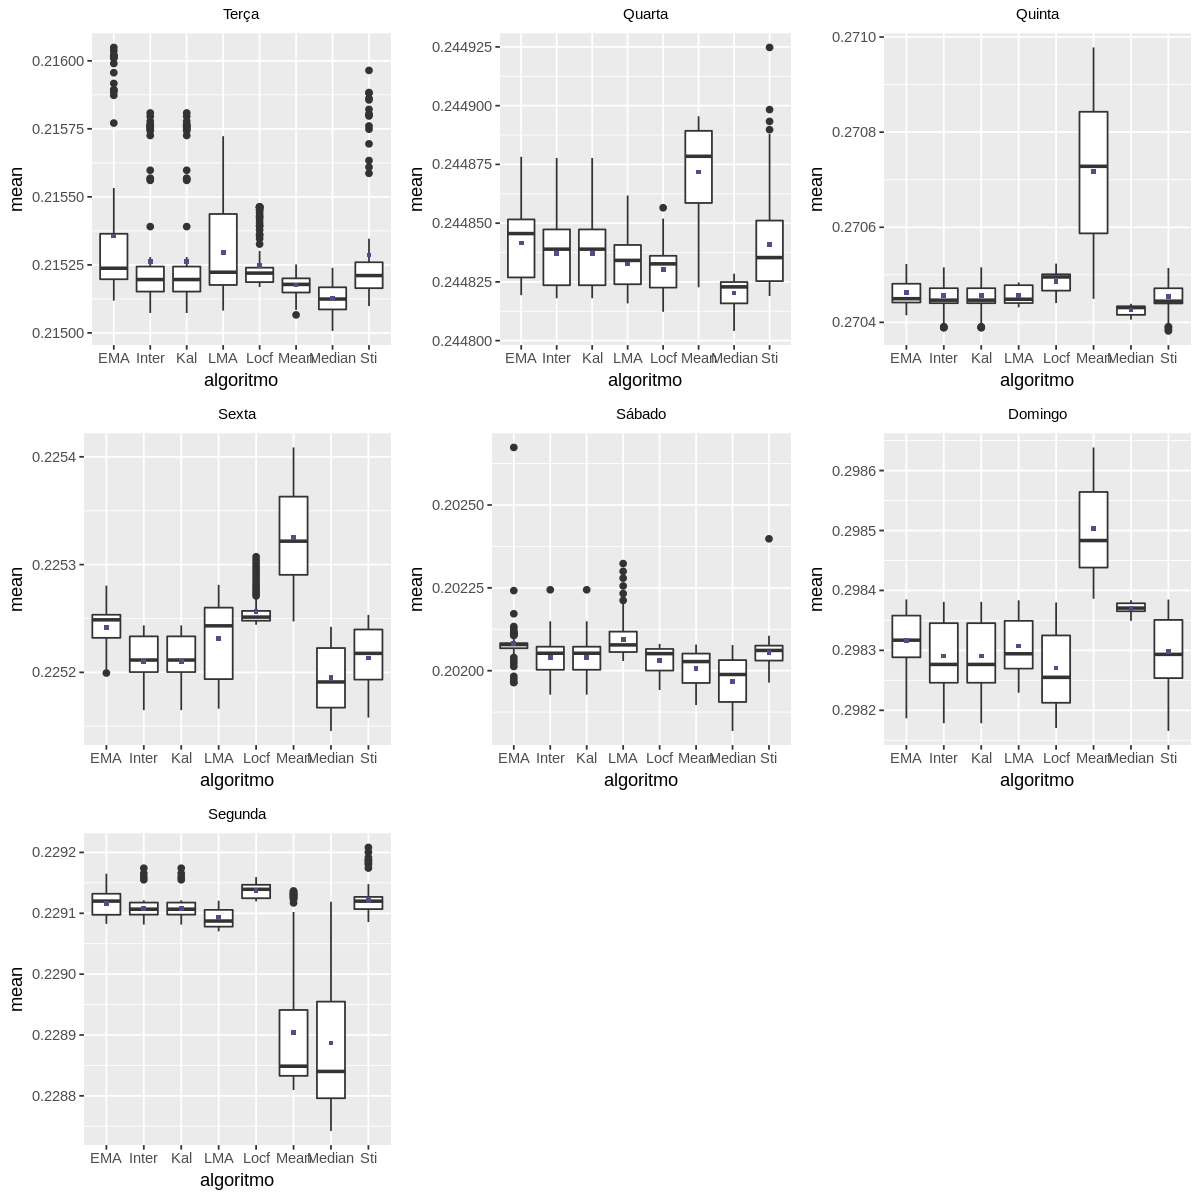

In [37]:
days=c("Terça", "Quarta", "Quinta", "Sexta", "Sábado", "Domingo", "Segunda")

q=list()
min=0
max=0.022
for (i in seq(1,7,1)){
    q[[i]]=ggplot(todosQuartos[which(todosQuartos$quarto==4 & todosQuartos$dia==i & todosQuartos$algoritmo!="Spline"),], aes(x=algoritmo, y=mean)) + 
    geom_boxplot()+
    ggtitle("Boxplot q2")+  theme(plot.title = element_text(hjust = 0.5)) +
   # ylim(min,max)+
    stat_summary(fun.y = "mean", geom = "point", colour = "mediumpurple4", shape = 15, size = 1)+
    ggtitle(paste(days[i]))+  theme(plot.title = element_text(hjust = 0.5, size=9))
}
#print(q)


options(repr.plot.width=10, repr.plot.height=10)
do.call("grid.arrange", c(q, ncol=3))

Media de todos os quartis:

Plotagem do histograma de todos os resultados dos algoritmos em histograma. 

Histograma dos algoritmos
=====
plotagem do histogram de cada algoritmo por cada quartil

In [15]:
options(repr.plot.width=10, repr.plot.height=3)
#summary(todosQuartis)

plot_EMAq2=ggplot(todosQuartis[which(todosQuartis$Algoritmo=="EMA"),], aes(q2)) + 
    geom_histogram()+  
    scale_x_continuous(expand = c(0,0)) + 
    scale_y_continuous (expand=c(0,0)) + stat_bin(binwidth =0.0001) +
    theme(legend.position = "top", legend.direction = "horizontal") + 
    ggtitle("Histograma q2\n EMA ")+  theme(plot.title = element_text(hjust = 0.5))

plot_EMAq3=ggplot(todosQuartis[which(todosQuartis$Algoritmo=="EMA"),], aes(q3))+
    geom_histogram()+
    scale_x_continuous(expand = c(0,0)) + 
    scale_y_continuous (expand=c(0,0)) + stat_bin(binwidth =0.0001) +
    theme(legend.position = "top", legend.direction = "horizontal") + 
    ggtitle("Histograma q3\n EMA ")+  theme(plot.title = element_text(hjust = 0.5))

plot_EMAq4=ggplot(todosQuartis[which(todosQuartis$Algoritmo=="EMA"),], aes(q4))+
    geom_histogram()+
    scale_x_continuous(expand = c(0,0)) + 
    scale_y_continuous (expand=c(0,0)) + stat_bin(binwidth =0.0001) +
    theme(legend.position = "top", legend.direction = "horizontal") + 
    ggtitle("Histograma q4\n EMA ")+  theme(plot.title = element_text(hjust = 0.5))

grid.arrange(plot_EMAq2, plot_EMAq3, plot_EMAq4, nrow=1, ncol=3)

plot_Interpolationq2=ggplot(todosQuartis[which(todosQuartis$Algoritmo=="Interpolation"),], aes(q2)) + 
    geom_histogram()+  
    scale_x_continuous(expand = c(0,0)) + 
    scale_y_continuous (expand=c(0,0)) + stat_bin(binwidth =0.0001) +
    theme(legend.position = "top", legend.direction = "horizontal") + 
    ggtitle("Histograma q2\n Interpolation ")+  theme(plot.title = element_text(hjust = 0.5))

plot_Interpolationq3=ggplot(todosQuartis[which(todosQuartis$Algoritmo=="Interpolation"),], aes(q3))+
    geom_histogram()+
    scale_x_continuous(expand = c(0,0)) + 
    scale_y_continuous (expand=c(0,0)) + stat_bin(binwidth =0.0001) +
    theme(legend.position = "top", legend.direction = "horizontal") + 
    ggtitle("Histograma q3\n Interpolation ")+  theme(plot.title = element_text(hjust = 0.5))

plot_Interpolationq4=ggplot(todosQuartis[which(todosQuartis$Algoritmo=="Interpolation"),], aes(q4))+
    geom_histogram()+
    scale_x_continuous(expand = c(0,0)) + 
    scale_y_continuous (expand=c(0,0)) + stat_bin(binwidth =0.0001) +
    theme(legend.position = "top", legend.direction = "horizontal") + 
    ggtitle("Histograma q4\n Interpolation ")+  theme(plot.title = element_text(hjust = 0.5))

grid.arrange(plot_Interpolationq2, plot_Interpolationq3, plot_Interpolationq4, nrow=1, ncol=3)

plot_Kalmanq2=ggplot(todosQuartis[which(todosQuartis$Algoritmo=="Kalman"),], aes(q2)) + 
    geom_histogram()+  
    scale_x_continuous(expand = c(0,0)) + 
    scale_y_continuous (expand=c(0,0)) + stat_bin(binwidth =0.0001) +
    theme(legend.position = "top", legend.direction = "horizontal") + 
    ggtitle("Histograma q2\n Kalman ")+  theme(plot.title = element_text(hjust = 0.5))

plot_Kalmanq3=ggplot(todosQuartis[which(todosQuartis$Algoritmo=="Kalman"),], aes(q3))+
    geom_histogram()+
    scale_x_continuous(expand = c(0,0)) + 
    scale_y_continuous (expand=c(0,0)) + stat_bin(binwidth =0.0001) +
    theme(legend.position = "top", legend.direction = "horizontal") + 
    ggtitle("Histograma q3\n Kalman ")+  theme(plot.title = element_text(hjust = 0.5))

plot_Kalmanq4=ggplot(todosQuartis[which(todosQuartis$Algoritmo=="Kalman"),], aes(q4))+
    geom_histogram()+
    scale_x_continuous(expand = c(0,0)) + 
    scale_y_continuous (expand=c(0,0)) + stat_bin(binwidth =0.0001) +
    theme(legend.position = "top", legend.direction = "horizontal") + 
    ggtitle("Histograma q4\n Kalman ")+  theme(plot.title = element_text(hjust = 0.5))

grid.arrange(plot_Kalmanq2, plot_Kalmanq3, plot_Kalmanq4, nrow=1, ncol=3)

plot_LMAq2=ggplot(todosQuartis[which(todosQuartis$Algoritmo=="LMA"),], aes(q2)) + 
    geom_histogram()+  
    scale_x_continuous(expand = c(0,0)) + 
    scale_y_continuous (expand=c(0,0)) + stat_bin(binwidth =0.0001) +
    theme(legend.position = "top", legend.direction = "horizontal") + 
    ggtitle("Histograma q2\n LMA ")+  theme(plot.title = element_text(hjust = 0.5))

plot_LMAq3=ggplot(todosQuartis[which(todosQuartis$Algoritmo=="LMA"),], aes(q3))+
    geom_histogram()+
    scale_x_continuous(expand = c(0,0)) + 
    scale_y_continuous (expand=c(0,0)) + stat_bin(binwidth =0.0001) +
    theme(legend.position = "top", legend.direction = "horizontal") + 
    ggtitle("Histograma q3\n LMA ")+  theme(plot.title = element_text(hjust = 0.5))

plot_LMAq4=ggplot(todosQuartis[which(todosQuartis$Algoritmo=="LMA"),], aes(q4))+
    geom_histogram()+
    scale_x_continuous(expand = c(0,0)) + 
    scale_y_continuous (expand=c(0,0)) + stat_bin(binwidth =0.0001) +
    theme(legend.position = "top", legend.direction = "horizontal") + 
    ggtitle("Histograma q4\n LMA ")+  theme(plot.title = element_text(hjust = 0.5))

grid.arrange(plot_LMAq2, plot_LMAq3, plot_LMAq4, nrow=1, ncol=3)

plot_Locfq2=ggplot(todosQuartis[which(todosQuartis$Algoritmo=="Locf"),], aes(q2)) + 
    geom_histogram()+  
    scale_x_continuous(expand = c(0,0)) + 
    scale_y_continuous (expand=c(0,0)) + stat_bin(binwidth =0.0001) +
    theme(legend.position = "top", legend.direction = "horizontal") + 
    ggtitle("Histograma q2\n Locf ")+  theme(plot.title = element_text(hjust = 0.5))

plot_Locfq3=ggplot(todosQuartis[which(todosQuartis$Algoritmo=="Locf"),], aes(q3))+
    geom_histogram()+
    scale_x_continuous(expand = c(0,0)) + 
    scale_y_continuous (expand=c(0,0)) + stat_bin(binwidth =0.0001) +
    theme(legend.position = "top", legend.direction = "horizontal") + 
    ggtitle("Histograma q3\n Locf ")+  theme(plot.title = element_text(hjust = 0.5))

plot_Locfq4=ggplot(todosQuartis[which(todosQuartis$Algoritmo=="Locf"),], aes(q4))+
    geom_histogram()+
    scale_x_continuous(expand = c(0,0)) + 
    scale_y_continuous (expand=c(0,0)) + stat_bin(binwidth =0.0001) +
    theme(legend.position = "top", legend.direction = "horizontal") + 
    ggtitle("Histograma q4\n Locf ")+  theme(plot.title = element_text(hjust = 0.5))

grid.arrange(plot_Locfq2, plot_Locfq3, plot_Locfq4, nrow=1, ncol=3)

plot_Meanq2=ggplot(todosQuartis[which(todosQuartis$Algoritmo=="Mean"),], aes(q2)) + 
    geom_histogram()+  
    scale_x_continuous(expand = c(0,0)) + 
    scale_y_continuous (expand=c(0,0)) + stat_bin(binwidth =0.0001) +
    theme(legend.position = "top", legend.direction = "horizontal") + 
    ggtitle("Histograma q2\n Mean ")+  theme(plot.title = element_text(hjust = 0.5))

plot_Meanq3=ggplot(todosQuartis[which(todosQuartis$Algoritmo=="Mean"),], aes(q3))+
    geom_histogram()+
    scale_x_continuous(expand = c(0,0)) + 
    scale_y_continuous (expand=c(0,0)) + stat_bin(binwidth =0.0001) +
    theme(legend.position = "top", legend.direction = "horizontal") + 
    ggtitle("Histograma q3\n Mean ")+  theme(plot.title = element_text(hjust = 0.5))

plot_Meanq4=ggplot(todosQuartis[which(todosQuartis$Algoritmo=="Mean"),], aes(q4))+
    geom_histogram()+
    scale_x_continuous(expand = c(0,0)) + 
    scale_y_continuous (expand=c(0,0)) + stat_bin(binwidth =0.0001) +
    theme(legend.position = "top", legend.direction = "horizontal") + 
    ggtitle("Histograma q4\n Mean ")+  theme(plot.title = element_text(hjust = 0.5))

grid.arrange(plot_Meanq2, plot_Meanq3, plot_Meanq4, nrow=1, ncol=3)

plot_Medianq2=ggplot(todosQuartis[which(todosQuartis$Algoritmo=="Median"),], aes(q2)) + 
    geom_histogram()+  
    scale_x_continuous(expand = c(0,0)) + 
    scale_y_continuous (expand=c(0,0)) + stat_bin(binwidth =0.0001) +
    theme(legend.position = "top", legend.direction = "horizontal") + 
    ggtitle("Histograma q2\n Median ")+  theme(plot.title = element_text(hjust = 0.5))

plot_Medianq3=ggplot(todosQuartis[which(todosQuartis$Algoritmo=="Median"),], aes(q3))+
    geom_histogram()+
    scale_x_continuous(expand = c(0,0)) + 
    scale_y_continuous (expand=c(0,0)) + stat_bin(binwidth =0.0001) +
    theme(legend.position = "top", legend.direction = "horizontal") + 
    ggtitle("Histograma q3\n Median ")+  theme(plot.title = element_text(hjust = 0.5))

plot_Medianq4=ggplot(todosQuartis[which(todosQuartis$Algoritmo=="Median"),], aes(q4))+
    geom_histogram()+
    scale_x_continuous(expand = c(0,0)) + 
    scale_y_continuous (expand=c(0,0)) + stat_bin(binwidth =0.0001) +
    theme(legend.position = "top", legend.direction = "horizontal") + 
    ggtitle("Histograma q4\n Median ")+  theme(plot.title = element_text(hjust = 0.5))

grid.arrange(plot_Medianq2, plot_Medianq3, plot_Medianq4, nrow=1, ncol=3)

plot_SMAq2=ggplot(todosQuartis[which(todosQuartis$Algoritmo=="SMA"),], aes(q2)) + 
    geom_histogram()+  
    scale_x_continuous(expand = c(0,0)) + 
    scale_y_continuous (expand=c(0,0)) + stat_bin(binwidth =0.0001) +
    theme(legend.position = "top", legend.direction = "horizontal") + 
    ggtitle("Histograma q2\n SMA ")+  theme(plot.title = element_text(hjust = 0.5))

plot_SMAq3=ggplot(todosQuartis[which(todosQuartis$Algoritmo=="SMA"),], aes(q3))+
    geom_histogram()+
    scale_x_continuous(expand = c(0,0)) + 
    scale_y_continuous (expand=c(0,0)) + stat_bin(binwidth =0.0001) +
    theme(legend.position = "top", legend.direction = "horizontal") + 
    ggtitle("Histograma q3\n SMA ")+  theme(plot.title = element_text(hjust = 0.5))

plot_SMAq4=ggplot(todosQuartis[which(todosQuartis$Algoritmo=="SMA"),], aes(q4))+
    geom_histogram()+
    scale_x_continuous(expand = c(0,0)) + 
    scale_y_continuous (expand=c(0,0)) + stat_bin(binwidth =0.0001) +
    theme(legend.position = "top", legend.direction = "horizontal") + 
    ggtitle("Histograma q4\n SMA ")+  theme(plot.title = element_text(hjust = 0.5))

grid.arrange(plot_SMAq2, plot_SMAq3, plot_SMAq4, nrow=1, ncol=3)

plot_Splineq2=ggplot(todosQuartis[which(todosQuartis$Algoritmo=="Spline"),], aes(q2)) + 
    geom_histogram()+  
    scale_x_continuous(expand = c(0,0)) + 
    scale_y_continuous (expand=c(0,0)) + stat_bin(binwidth =0.0001) +
    theme(legend.position = "top", legend.direction = "horizontal") + 
    ggtitle("Histograma q2\n Spline ")+  theme(plot.title = element_text(hjust = 0.5))

plot_Splineq3=ggplot(todosQuartis[which(todosQuartis$Algoritmo=="Spline"),], aes(q3))+
    geom_histogram()+
    scale_x_continuous(expand = c(0,0)) + 
    scale_y_continuous (expand=c(0,0)) + stat_bin(binwidth =0.0001) +
    theme(legend.position = "top", legend.direction = "horizontal") + 
    ggtitle("Histograma q3\n Spline ")+  theme(plot.title = element_text(hjust = 0.5))

plot_Splineq4=ggplot(todosQuartis[which(todosQuartis$Algoritmo=="Spline"),], aes(q4))+
    geom_histogram()+
    scale_x_continuous(expand = c(0,0)) + 
    scale_y_continuous (expand=c(0,0)) + stat_bin(binwidth =0.0001) +
    theme(legend.position = "top", legend.direction = "horizontal") + 
    ggtitle("Histograma q4\n Spline ")+  theme(plot.title = element_text(hjust = 0.5))

grid.arrange(plot_Splineq2, plot_Splineq3, plot_Splineq4, nrow=1, ncol=3)

plot_Stineq2=ggplot(todosQuartis[which(todosQuartis$Algoritmo=="Stine"),], aes(q2)) + 
    geom_histogram()+  
    scale_x_continuous(expand = c(0,0)) + 
    scale_y_continuous (expand=c(0,0)) + stat_bin(binwidth =0.0001) +
    theme(legend.position = "top", legend.direction = "horizontal") + 
    ggtitle("Histograma q2\n Stine ")+  theme(plot.title = element_text(hjust = 0.5))

plot_Stineq3=ggplot(todosQuartis[which(todosQuartis$Algoritmo=="Stine"),], aes(q3))+
    geom_histogram()+
    scale_x_continuous(expand = c(0,0)) + 
    scale_y_continuous (expand=c(0,0)) + stat_bin(binwidth =0.0001) +
    theme(legend.position = "top", legend.direction = "horizontal") + 
    ggtitle("Histograma q3\n Stine ")+  theme(plot.title = element_text(hjust = 0.5))

plot_Stineq4=ggplot(todosQuartis[which(todosQuartis$Algoritmo=="Stine"),], aes(q4))+
    geom_histogram()+
    scale_x_continuous(expand = c(0,0)) + 
    scale_y_continuous (expand=c(0,0)) + stat_bin(binwidth =0.0001) +
    theme(legend.position = "top", legend.direction = "horizontal") + 
    ggtitle("Histograma q4\n Stine ")+  theme(plot.title = element_text(hjust = 0.5))

grid.arrange(plot_Stineq2, plot_Stineq3, plot_Stineq4, nrow=1, ncol=3)

ERROR: Error in ggplot(todosQuartis[which(todosQuartis$Algoritmo == "EMA"), ], : object 'todosQuartis' not found


Delineamento Completamente Casualisado – DCC
--


In [ ]:
options(repr.plot.width=10, repr.plot.height=70)
#head(todosQuartis)
#select(todosQuartis[,],)
#attach(todosQuartis)
metodo=as.factor(todosQuartis$Algoritmo)
variavel=todosQuartis$q2
#boxplot(variavel~metodo)
modelo1=aov(variavel~metodo)
anova(modelo1)
#plot(modeloa)
#by(variavel, metodo, shapiro.test)
#bartlett.test(variavel~metodo)
comparacoes= TukeyHSD(modelo1, "metodo", ord=T, conf.level = 0.95)
comparacoes
plot(comparacoes)

In [ ]:
options(repr.plot.width=10, repr.plot.height=70)
#head(todosQuartis)
#select(todosQuartis[,],)
#attach(todosQuartis)
metodo=as.factor(todos$Algoritmo[which(todos$tamanho<5)])
variavel=todos$rmse[which(todos$tamanho<5)]
#boxplot(variavel~metodo)
modelo1=aov(variavel~metodo)
anova(modelo1)
#plot(modeloa)
#by(variavel, metodo, shapiro.test)
#bartlett.test(variavel~metodo)

comparacoes= TukeyHSD(modelo1, "metodo", ord=T, conf.level = 0.95)
comparacoes
plot(comparacoes)

In [ ]:
#install.packages("units", "units_0.6-5.tar.gz")
#install.packages('udunits2')
#install.packages('udunits2', repos='http://cran.rstudio.com/')
#install.packages("sf")
#install.packages("units")
#install.packages( "spdep")
#install.packages("units")

#install.packages("agricolae", "agricolae_1.3-1.tar.gz")

In [ ]:
#require(agricolae)
df = df.residual(modelo1)
Ms.erro = deviance(modelo1)/df
letras = HSD.test(variavel,metodo,df,Ms.erro, alpha=0.05,group=T)
letras
head(todosQ)


Resultados pelos Quartis
===========
Nos gráficos abaixo podem sererm vistos os resultados da imputação de dados dos quartis 2,3 e 4 de 0 a 100
* note que os gráficos estão na mesma escala


In [ ]:
options(repr.plot.width=10, repr.plot.height=20)

min=min(todosQuartis$q2, todosQuartis$q3, todosQuartis$q4)
max=max(todosQuartis$q2, todosQuartis$q3, todosQuartis$q4)

todosq2=ggplot(todosQuartis, aes(x=tamanho,y=q2, colour=Algoritmo))+
    geom_point()+
    geom_line()+
    labs(y="RMSE", x="Tamanho da Lacuna")+ 
theme(legend.position = "top", legend.direction = "horizontal") + 
ylim(min,max) + 
ggtitle("Segundo Quartil")+  theme(plot.title = element_text(hjust = 0.5))


todosq3=ggplot(todosQuartis, aes(x=tamanho,y=q3, colour=Algoritmo))+
    geom_point()+
    geom_line()+
    labs(y="RMSE", x="Tamanho da Lacuna")+ 
theme(legend.position = "top", legend.direction = "horizontal") + 
ylim(min,max) + 
ggtitle("Terceiro Quartil")+  theme(plot.title = element_text(hjust = 0.5))

todosq4=ggplot(todosQuartis, aes(x=tamanho,y=q4, colour=Algoritmo))+
    geom_point()+
    geom_line()+
    labs(y="RMSE", x="Tamanho da Lacuna")+ 
theme(legend.position = "top", legend.direction = "horizontal") + 
ylim(min,max) + 
ggtitle("Quarto Quartil")+  theme(plot.title = element_text(hjust = 0.5))

grid.arrange(todosq2,todosq3,todosq4, nrow=3)





Como pode ser visto, o algoritmo spline ficou muito distante dos demais. Retirando o mesmo da plotagem: 

In [ ]:
options(repr.plot.width=10, repr.plot.height=20)

todosQuartis=todosQuartis[which(todosQuartis$Algoritmo!="Spline"),]
min=min(todosQuartis$q2, todosQuartis$q3, todosQuartis$q4)
max=max(todosQuartis$q2, todosQuartis$q3, todosQuartis$q4)

todosq2=ggplot(todosQuartis, aes(x=tamanho,y=q2, colour=Algoritmo))+
    geom_point()+
    geom_line()+
    labs(y="RMSE", x="Tamanho da Lacuna")+ 
theme(legend.position = "top", legend.direction = "horizontal") + 
ylim(min,max) + 
ggtitle("Segundo Quartil")+  theme(plot.title = element_text(hjust = 0.5))


todosq3=ggplot(todosQuartis, aes(x=tamanho,y=q3, colour=Algoritmo))+
    geom_point()+
    geom_line()+
    labs(y="RMSE", x="Tamanho da Lacuna")+ 
theme(legend.position = "top", legend.direction = "horizontal") + 
ylim(min,max) + 
ggtitle("Terceiro Quartil")+  theme(plot.title = element_text(hjust = 0.5))

todosq4=ggplot(todosQuartis, aes(x=tamanho,y=q4, colour=Algoritmo))+
    geom_point()+
    geom_line()+
    labs(y="RMSE", x="Tamanho da Lacuna")+ 
theme(legend.position = "top", legend.direction = "horizontal") + 
ylim(min,max) + 
ggtitle("Quarto Quartil")+  theme(plot.title = element_text(hjust = 0.5))

grid.arrange(todosq2,todosq3,todosq4, nrow=3)



In [ ]:
#todosQuartis=todosQuartis[which(todosQuartis$tamanho<=50),]
min=min(todosQuartis$q2[which(todosQuartis$tamanho<50)], todosQuartis$q3[which(todosQuartis$tamanho<50)], todosQuartis$q4[which(todosQuartis$tamanho<50)])
max=max(todosQuartis$q2[which(todosQuartis$tamanho<50)], todosQuartis$q3[which(todosQuartis$tamanho<50)], todosQuartis$q4[which(todosQuartis$tamanho<50)])

p1=ggplot(todosQuartis[which(todosQuartis$tamanho<50),], aes(x=tamanho,y=q2, colour=Algoritmo))+
    geom_point()+
    geom_line()+
    labs(y="RMSE", x="Tamanho da Lacuna")+ 
theme(legend.position = "top", legend.direction = "horizontal")+
ggtitle("Segundo Quartil")+  theme(plot.title = element_text(hjust = 0.5))+
ylim(min,max)

p2=ggplot(todosQuartis[which(todosQuartis$tamanho<50),], aes(x=tamanho,y=q3, colour=Algoritmo))+
    geom_point()+
    geom_line()+
    labs(y="RMSE", x="Tamanho da Lacuna")+ 
theme(legend.position = "top", legend.direction = "horizontal")+
ggtitle("Terceiro Quartil")+  theme(plot.title = element_text(hjust = 0.5))+
ylim(min,max)

p3=ggplot(todosQuartis[which(todosQuartis$tamanho<50),], aes(x=tamanho,y=q4, colour=Algoritmo))+
    geom_point()+
    geom_line()+
    labs(y="RMSE", x="Tamanho da Lacuna")+ 
theme(legend.position = "top", legend.direction = "horizontal")+
ggtitle("Quarto Quartil")+  theme(plot.title = element_text(hjust = 0.5))+
ylim(min,max)

grid.arrange(p1,p2,p3, nrow=3)


In [ ]:
#todosQuartis=todosQuartis[which(todosQuartis$tamanho>=50),]
min=min(todosQuartis$q2[which(todosQuartis$tamanho>50)], todosQuartis$q3[which(todosQuartis$tamanho>50)], todosQuartis$q4[which(todosQuartis$tamanho>50)])
max=max(todosQuartis$q2[which(todosQuartis$tamanho>50)], todosQuartis$q3[which(todosQuartis$tamanho>50)], todosQuartis$q4[which(todosQuartis$tamanho>50)])

p1=ggplot(todosQuartis[which(todosQuartis$tamanho>50),], aes(x=tamanho,y=q2, colour=Algoritmo))+
    geom_point()+
    geom_line()+
    labs(y="RMSE", x="Tamanho da Lacuna")+ 
theme(legend.position = "top", legend.direction = "horizontal")+
ggtitle("Segundo Quartil")+  theme(plot.title = element_text(hjust = 0.5))+
ylim(min,max)

p2=ggplot(todosQuartis[which(todosQuartis$tamanho>50),], aes(x=tamanho,y=q3, colour=Algoritmo))+
    geom_point()+
    geom_line()+
    labs(y="RMSE", x="Tamanho da Lacuna")+ 
theme(legend.position = "top", legend.direction = "horizontal")+
ggtitle("Terceiro Quartil")+  theme(plot.title = element_text(hjust = 0.5))+
ylim(min,max)

p3=ggplot(todosQuartis[which(todosQuartis$tamanho>50),], aes(x=tamanho,y=q4, colour=Algoritmo))+
    geom_point()+
    geom_line()+
    labs(y="RMSE", x="Tamanho da Lacuna")+ 
theme(legend.position = "top", legend.direction = "horizontal")+
ggtitle("Quarto Quartil")+  theme(plot.title = element_text(hjust = 0.5))+
ylim(min,max)

grid.arrange(p1,p2,p3, nrow=3)


Percebe-se que no terceiro quartil o valor do RMSE varia-se mais. Pode ser por conta do maior variação do uso de energia no terceiro quarto do dia (Na perte da tarde) 

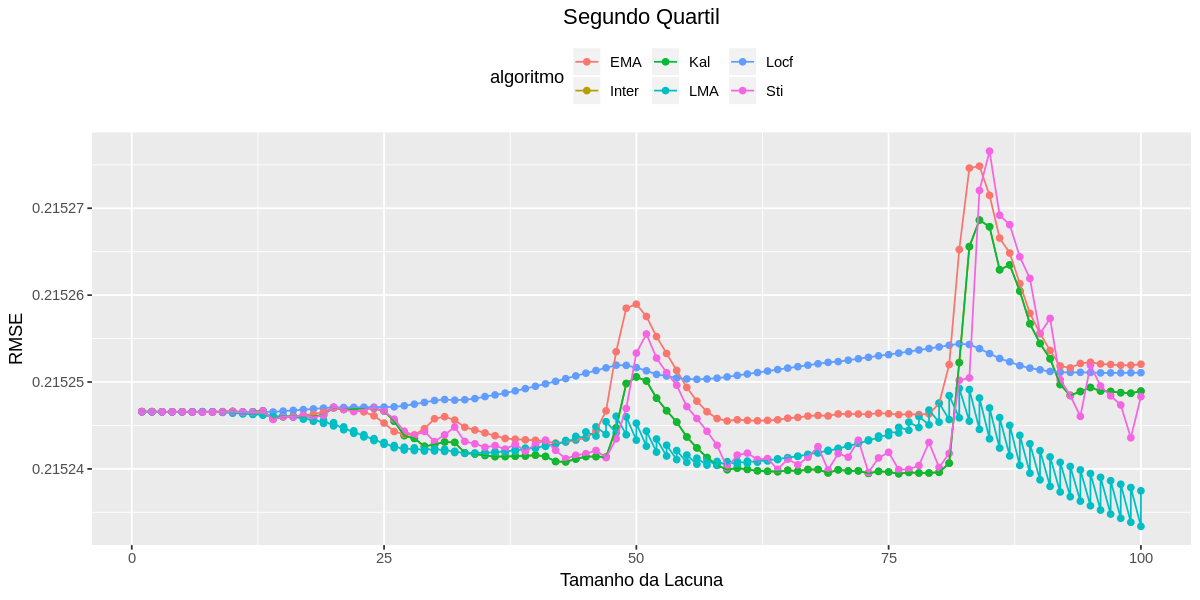

In [38]:
options(repr.plot.width=10, repr.plot.height=5)
q2= todosQuartos[which(todosQuartos$quarto==2),]
q3=todosQuartos[which(todosQuartos$quarto==3),]
q4=todosQuartos[which(todosQuartos$quarto==4),]

q2$tamanho=seq(1,100)
q3$tamanho=seq(1,100)
q4$tamanho=seq(1,100)

min=min(q2$mean,q3$mean,q4$mean)
max=max(q2$mean,q3$mean,q4$mean)

todosq2=ggplot(q2[which(q2$dia==1 &  q2$algoritmo!="Mean" &  q2$algoritmo!="Median" & q2$algoritmo!="Spline"),], aes(x=tamanho,y=mean, colour=algoritmo))+
    geom_point()+
    geom_line()+
    labs(y="RMSE", x="Tamanho da Lacuna")+ 
theme(legend.position = "top", legend.direction = "horizontal") + 
#ylim(min,max) + 
ggtitle("Segundo Quartil")+  theme(plot.title = element_text(hjust = 0.5))

todosq2

trecho de código de funções de tratamento

In [ ]:
#função para auxilio
func <- function(i){
    ob=c(i,i+100,i+200)
    return(ob)
}

#função que retorna a média das métricas a partir do tamanho da lacuna, ou seja, 
#media de todas as lacunas de tamanho 1,2,3...n
#Passando como parâmetro os dados, a métrica e o tipo(media, sd ou var)

mediaLac <- function(data_vector, metrica, type){
    tst=data_vector %>% select(metrica)
    mediaLac=c()
    media=c()
    for(z in seq(1,100,1)){
        for (i in seq(z,9000,300)){
            a=(func(i))
            if(type==1){ 
                mediaLac=append(mediaLac,(mean(tst[a,])))
            } else if(type==2){
                mediaLac=append(mediaLac,(sd(tst[a,])))
            }else if(type==3){
                mediaLac=append(mediaLac,(var(tst[a,])))
            }
        }
    }
    for (i in seq(1,3000,30)) {
    #calculando a média
        if(type==1){ 
            media=append(media,(mean(mediaLac[i:(i+29)])))
        } else if(type==2){
            media=append(media,(sd(mediaLac[i:(i+29)])))
        }else if(type==3){
            media=append(media,(var(mediaLac[i:(i+29)])))
        }
    }    
    return (media)
}

Trecho de código de cálculo das médias

In [ ]:
mediaKal=c()
mediaInter=c()
mediaLocf=c()
mediaMean=c()
mediaMedian=c()
mediaMalExp=c()
mediaMalLin=c()
mediaMalSim=c()
mediaSpl=c()
mediaSti=c()

mediaInter=as.data.frame(mediaLac(inter,"rmse", 1))
names(mediaInter)=c("rmse")
mediaInter$mse=mediaLac(inter,"mse", 1)
mediaInter$mae=(mediaLac(inter,"mae", 1))
mediaInter$tamanho=tamanhoGap
mediaInter$sdRmse=mediaLac(inter, "rmse", 2)
mediaInter$varRmse=mediaLac(inter, "rmse", 3)
mediaInter$sdMse=mediaLac(inter, "mse", 2)
mediaInter$varMse=mediaLac(inter, "mse", 3)
mediaInter$sdMae=mediaLac(inter, "mae", 2)
mediaInter$varMae=mediaLac(inter, "mae", 3)
mediaInter$Algoritmo="Interpolation"

mediaKal=as.data.frame(mediaLac(kalman,"rmse", 1))
names(mediaKal)=c("rmse")
mediaKal$mse=mediaLac(kalman,"mse", 1)
mediaKal$mae=(mediaLac(kalman,"mae", 1))
mediaKal$tamanho=tamanhoGap
mediaKal$sdRmse=mediaLac(kalman, "rmse", 2)
mediaKal$varRmse=mediaLac(kalman, "rmse", 3)
mediaKal$sdMse=mediaLac(kalman, "mse", 2)
mediaKal$varMse=mediaLac(kalman, "mse", 3)
mediaKal$sdMae=mediaLac(kalman, "mae", 2)
mediaKal$varMae=mediaLac(kalman, "mae", 3)
mediaKal$Algoritmo="Kalman"

mediaLocf=as.data.frame(mediaLac(locf,"rmse", 1))
names(mediaLocf)=c("rmse")
mediaLocf$mse=mediaLac(locf,"mse", 1)
mediaLocf$mae=(mediaLac(locf,"mae", 1))
mediaLocf$tamanho=tamanhoGap
mediaLocf$sdRmse=mediaLac(locf, "rmse", 2)
mediaLocf$varRmse=mediaLac(locf, "rmse", 3)
mediaLocf$sdMse=mediaLac(locf, "mse", 2)
mediaLocf$varMse=mediaLac(locf, "mse", 3)
mediaLocf$sdMae=mediaLac(locf, "mae", 2)
mediaLocf$varMae=mediaLac(locf, "mae", 3)
mediaLocf$Algoritmo="Locf"

mediaMean=as.data.frame(mediaLac(mean,"rmse", 1))
names(mediaMean)=c("rmse")
mediaMean$mse=mediaLac(mean,"mse", 1)
mediaMean$mae=(mediaLac(mean,"mae", 1))
mediaMean$tamanho=tamanhoGap
mediaMean$sdRmse=mediaLac(mean, "rmse", 2)
mediaMean$varRmse=mediaLac(mean, "rmse", 3)
mediaMean$sdMse=mediaLac(mean, "mse", 2)
mediaMean$varMse=mediaLac(mean, "mse", 3)
mediaMean$sdMae=mediaLac(mean, "mae", 2)
mediaMean$varMae=mediaLac(mean, "mae", 3)
mediaMean$Algoritmo="Mean"

mediaMedian=as.data.frame(mediaLac(median,"rmse", 1))
names(mediaMedian)=c("rmse")
mediaMedian$mse=mediaLac(median,"mse", 1)
mediaMedian$mae=(mediaLac(median,"mae", 1))
mediaMedian$tamanho=tamanhoGap
mediaMedian$sdRmse=mediaLac(median, "rmse", 2)
mediaMedian$varRmse=mediaLac(median, "rmse", 3)
mediaMedian$sdMse=mediaLac(median, "mse", 2)
mediaMedian$varMse=mediaLac(median, "mse", 3)
mediaMedian$sdMae=mediaLac(median, "mae", 2)
mediaMedian$varMae=mediaLac(median, "mae", 3)
mediaMedian$Algoritmo="Median"

mediaMalExp=as.data.frame(mediaLac(malExp,"rmse", 1))
names(mediaMalExp)=c("rmse")
mediaMalExp$mse=mediaLac(malExp,"mse", 1)
mediaMalExp$mae=(mediaLac(malExp,"mae", 1))
mediaMalExp$tamanho=tamanhoGap
mediaMalExp$sdRmse=mediaLac(malExp, "rmse", 2)
mediaMalExp$varRmse=mediaLac(malExp, "rmse", 3)
mediaMalExp$sdMse=mediaLac(malExp, "mse", 2)
mediaMalExp$varMse=mediaLac(malExp, "mse", 3)
mediaMalExp$sdMae=mediaLac(malExp, "mae", 2)
mediaMalExp$varMae=mediaLac(malExp, "mae", 3)
mediaMalExp$Algoritmo="EMA"

mediaMalLin=as.data.frame(mediaLac(malLin,"rmse", 1))
names(mediaMalLin)=c("rmse")
mediaMalLin$mse=mediaLac(malLin,"mse", 1)
mediaMalLin$mae=(mediaLac(malLin,"mae", 1))
mediaMalLin$tamanho=tamanhoGap
mediaMalLin$sdRmse=mediaLac(malLin, "rmse", 2)
mediaMalLin$varRmse=mediaLac(malLin, "rmse", 3)
mediaMalLin$sdMse=mediaLac(malLin, "mse", 2)
mediaMalLin$varMse=mediaLac(malLin, "mse", 3)
mediaMalLin$sdMae=mediaLac(malLin, "mae", 2)
mediaMalLin$varMae=mediaLac(malLin, "mae", 3)
mediaMalLin$Algoritmo="LMA"

mediaMalSim=as.data.frame(mediaLac(malSim,"rmse", 1))
names(mediaMalSim)=c("rmse")
mediaMalSim$mse=mediaLac(malSim,"mse", 1)
mediaMalSim$mae=(mediaLac(malSim,"mae", 1))
mediaMalSim$tamanho=tamanhoGap
mediaMalSim$sdRmse=mediaLac(malSim, "rmse", 2)
mediaMalSim$varRmse=mediaLac(malSim, "rmse", 3)
mediaMalSim$sdMse=mediaLac(malSim, "mse", 2)
mediaMalSim$varMse=mediaLac(malSim, "mse", 3)
mediaMalSim$sdMae=mediaLac(malSim, "mae", 2)
mediaMalSim$varMae=mediaLac(malSim, "mae", 3)
mediaMalSim$Algoritmo="SMA"

mediaSpl=as.data.frame(mediaLac(spl,"rmse", 1))
names(mediaSpl)=c("rmse")
mediaSpl$mse=mediaLac(spl,"mse", 1)
mediaSpl$mae=(mediaLac(spl,"mae", 1))
mediaSpl$tamanho=tamanhoGap
mediaSpl$sdRmse=mediaLac(spl, "rmse", 2)
mediaSpl$varRmse=mediaLac(spl, "rmse", 3)
mediaSpl$sdMse=mediaLac(spl, "mse", 2)
mediaSpl$varMse=mediaLac(spl, "mse", 3)
mediaSpl$sdMae=mediaLac(spl, "mae", 2)
mediaSpl$varMae=mediaLac(spl, "mae", 3)
mediaSpl$Algoritmo="Spline"

mediaSti=as.data.frame(mediaLac(sti,"rmse", 1))
names(mediaSti)=c("rmse")
mediaSti$mse=mediaLac(sti,"mse", 1)
mediaSti$mae=(mediaLac(sti,"mae", 1))
mediaSti$tamanho=tamanhoGap
mediaSti$sdRmse=mediaLac(sti, "rmse", 2)
mediaSti$varRmse=mediaLac(sti, "rmse", 3)
mediaSti$sdMse=mediaLac(sti, "mse", 2)
mediaSti$varMse=mediaLac(sti, "mse", 3)
mediaSti$sdMae=mediaLac(sti, "mae", 2)
mediaSti$varMae=mediaLac(sti, "mae", 3)
mediaSti$Algoritmo="Stine"

todos = rbind(mediaKal, mediaInter, mediaLocf, mediaMedian, mediaMean, mediaMalExp, mediaMalLin, mediaMalSim, mediaSpl, mediaSti)

In [ ]:
head(todos)

In [ ]:
options(repr.plot.width=10, repr.plot.height=5.5)
ggplot(todos, aes(x=tamanho,y=rmse, colour=Algoritmo))+
    geom_point()+
    geom_line()+
    labs(y="RMSE", x="Tamanho da Lacuna")+ 
theme(legend.position = "top", legend.direction = "horizontal")


In [ ]:
ggplot(todos[which(todos$tamanho<10),], aes(x=tamanho,y=rmse, colour=Algoritmo))+
    geom_point()+
    geom_line()+
    labs(y="RMSE", x="Tamanho da Lacuna")+ 
theme(legend.position = "top", legend.direction = "horizontal")

In [ ]:
ggplot(todos[which(todos$Algoritmo!= "Locf"  & todos$Algoritmo!= "Mean"  & todos$Algoritmo!= "Median"  &  todos$tamanho<10),], aes(x=tamanho,y=rmse, colour=Algoritmo))+
    geom_point()+
    geom_line()+
    labs(y="RMSE", x="Tamanho da Lacuna")+ 
theme(legend.position = "top", legend.direction = "horizontal")


In [ ]:
n=90 #tamanho da amostra. Ou seja, tem 90 lacunas de tamanho 1, 2 de tamanho 20... 90 de tamanho 100
error=qnorm(0.975)*todos$sd/sqrt(n)
todos$error=error
# The errorbars overlapped, so use position_dodge to move them horizontally
pd <- position_dodge(0.1) # move them .05 to the left and right

ggplot(todos, aes(x=tamanho,y=media, colour=algoritmo))+
    geom_point()+
    geom_line()+
    geom_errorbar(aes(ymin=media-error, ymax=media+error), linetype=11,  position=pd) +
    labs(y="RMSE", x="Tamanho da Lacuna")


In [ ]:
ggplot(todos[which(todos$algoritmo!= "Spline" & todos$tamanho<3000),], aes(x=tamanho,y=media, colour=algoritmo))+
    geom_point()+
    geom_line()+
    geom_errorbar(aes(ymin=media-error, ymax=media+error),linetype=11,  position=pd) +
    labs(y="RMSE", x="Tamanho da Lacuna") 
    


In [ ]:

ggplot(todos[which(todos$algoritmo!= "Spline" & todos$tamanho>50),], aes(x=tamanho,y=media, colour=algoritmo))+
    geom_point()+
    geom_line()+
   # geom_errorbar(aes(ymin=media-error, ymax=media+error),linetype=11,  position=pd) +
    labs(y="Tempo médio de Execução", x="Tamanho da Lacuna") 
    


In [ ]:
(filter(todos, tamanho==100))

In [ ]:
teste=(select(todos[order(todos$tamanho, todos$media, decreasing=c(FALSE,FALSE)),], -sd))

by_mean <- group_by(teste, tamanho)
#summarise(by_mean, rmseMin = min(media))

In [ ]:
#Agrupando o dataframe pelo tamanho e algoritmo
by_alg=group_by(teste, tamanho, algoritmo)
#select(by_alg, -var,-error)
#sumarizando o agrupamento pela menor média
by_length=summarise(by_alg, media=min(media))
tam=by_length %>% arrange(tamanho,media)
write.table(tam,"tamanhoEmedia.txt")
#filtrando o resultado pela menor média. 
a=by_length%>% filter(media==min(media))
a

write.table(a, "min.txt")

In [ ]:
#função que retorna a média das métricas a partir do tamanho da lacuna, ou seja, 
#media de todas as lacunas de tamanho 1,2,3...n
#Passando como parâmetro os dados, a métrica e o tipo(media, sd ou var)

mediaLacTempo <- function(data_vector){
    tst=data_vector
    mediaLac=c()
    media=c()
    for(z in seq(1,100,1)){
        for (i in seq(z,9000,300)){
            a=(func(i))
            mediaLac=append(mediaLac,(mean(tst[a])))
        }
    }
    for (i in seq(1,3000,30)) {
        #calculando a média
        media=append(media,(mean(mediaLac[i:(i+29)])))
    }    
    return (media)
}

In [ ]:
aux=scan("../ESC/1-100/alg.txt", what="complex")
tempo=as.data.frame(scan("../ESC/1-100/tempo.txt"))
names(tempo)=c("tempo")
tempo$Algoritmo=aux


In [ ]:

linear_interpolation=mediaLacTempo(tempo[which(tempo$Algoritmo=="linear_interpolation"),1])
spline_interpolation=mediaLacTempo(tempo[which(tempo$Algoritmo=="spline_interpolation"),1])
stine_interpolation=mediaLacTempo(tempo[which(tempo$Algoritmo=="stine_interpolation"),1])
kalmanSmoothing=mediaLacTempo(tempo[which(tempo$Algoritmo=="kalmanSmoothing"),1])
locf=mediaLacTempo(tempo[which(tempo$Algoritmo=="locf"),1])
movingAverage_simple=mediaLacTempo(tempo[which(tempo$Algoritmo=="movingAverage_simple"),1])
movingAverage_linear=mediaLacTempo(tempo[which(tempo$Algoritmo=="movingAverage_linear"),1])
movingAverage_exponential=mediaLacTempo(tempo[which(tempo$Algoritmo=="movingAverage_exponential"),1])
mean=mediaLacTempo(tempo[which(tempo$Algoritmo=="mean"),1])
median=mediaLacTempo(tempo[which(tempo$Algoritmo=="median"),1])
mode=mediaLacTempo(tempo[which(tempo$Algoritmo=="mode"),1])


todosTempo=rbind(linear_interpolation, spline_interpolation, stine_interpolation,kalmanSmoothing,locf,
                movingAverage_simple, movingAverage_linear,movingAverage_exponential, mean, median, mode)


In [ ]:
plot(todosTempo[3,])

In [ ]:
ggplot(todos, aes(x=tamanho,y=rmse, colour=Algoritmo))+
    geom_point()+
    geom_line()+
    labs(y="RMSE", x="Tamanho da Lacuna")+ 
theme(legend.position = "top", legend.direction = "horizontal")